## Polynomial Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [4]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

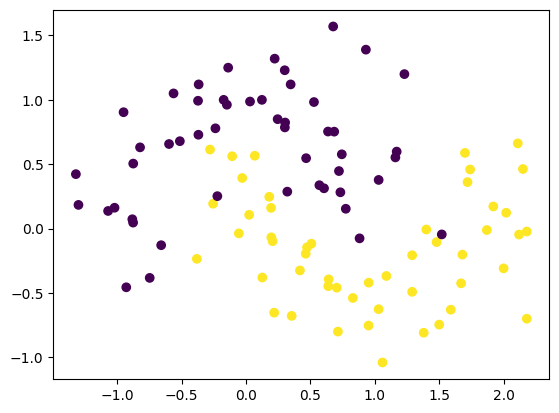

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [7]:
clf.fit(x,y)

LogisticRegression()

<Axes: >

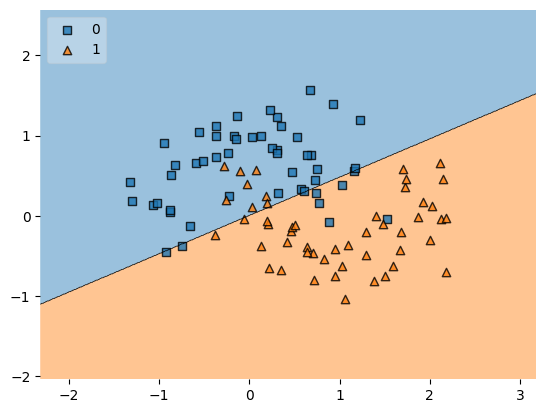

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y.astype('int'),clf,legend=2)

In [11]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trf = poly.fit_transform(x)

In [13]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10))

0.9

In [16]:
# Our own function
def plot_decision_boundary(x,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)

    clf = LogisticRegression()
    clf.fit(x_trf,y)

    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))

    a = np.arange(start=x[:,0].min()-1, stop=x[:,0].max()+1, step=0.01)
    b = np.arange(start=x[:,1].min()-1, stop=x[:,1].max()+1, step=0.01)

    xx,yy = np.meshgrid(a,b)

    input_array=np.array([xx.ravel(),yy.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title('Degree = {}, accuracy = {}'.format(degree,np.round(accuracy,4)))

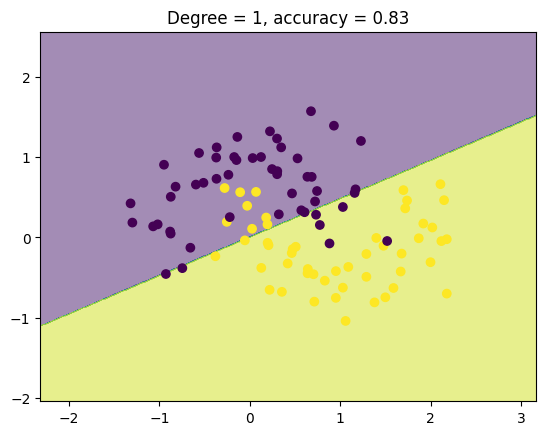

In [17]:
plot_decision_boundary(x,y)

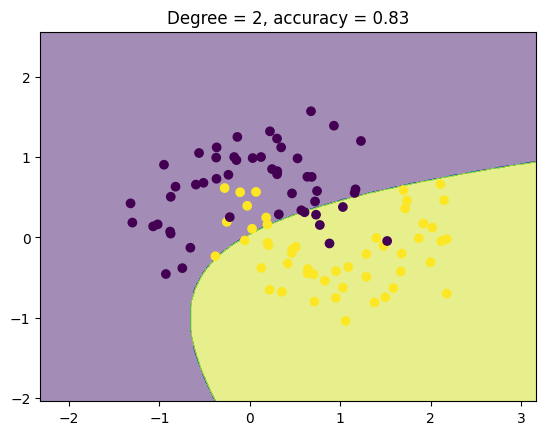

In [18]:
plot_decision_boundary(x,y,degree=2)

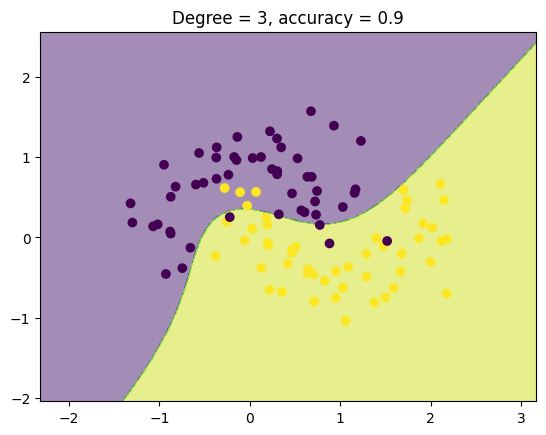

In [19]:
plot_decision_boundary(x,y,degree=3)

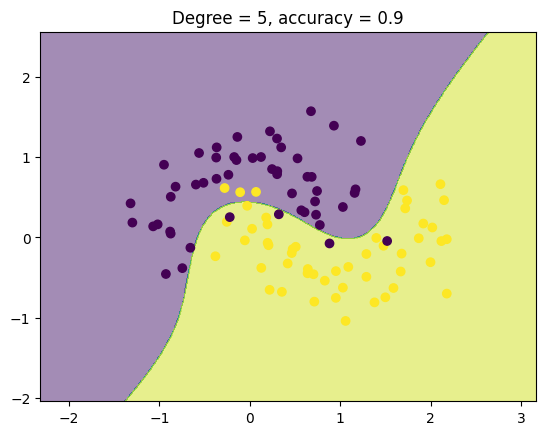

In [20]:
plot_decision_boundary(x,y,degree=5)